# Explore clustering options

In [1]:
d2011 = '/Users/edinhamzic/Symphony/wb_bangladesh/Bangladesh/output/all/all2011.csv'
d2016 = '/Users/edinhamzic/Symphony/wb_bangladesh/Bangladesh/output/all/all2016.csv'

In [13]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [14]:
data2011 = pd.read_csv(d2011)
data2016 = pd.read_csv(d2016)

In [15]:
for var in data2011.columns:
    if bool(re.search(r'mortality', var)):
        print(var)

rate_infant_mortality
rate_under5y_mortality
rate_maternal_mortality


In [16]:
districts2011 = data2011[['DistrictName', 'DistrictGeo']]
districts2016 = data2016[['DistrictName', 'DistrictGeo']]
variables = ['rate_maternal_mortality', 'rate_infant_mortality', 
             'rate_under5y_mortality']
data2011 = data2011[variables]
data2011.index = districts2011['DistrictName']
data2016 = data2016[variables]
data2016.index = districts2016['DistrictName']

In [17]:
data2011.head()

,rate_maternal_mortality,rate_infant_mortality,rate_under5y_mortality
DistrictName,,,
Bagerhat,27.97,20.98,27.97
Bandarban,4.69,51.64,56.34
Barguna,3.53,21.20,38.87
Barisal,2.64,50.13,52.77
Bhola,9.93,59.60,66.23


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


2011: count    64.000000
mean      3.729687
std       4.172789
min       0.000000
25%       0.000000
50%       3.220000
75%       5.040000
max      27.970000
Name: rate_maternal_mortality, dtype: float64
2016: count    64.000000
mean      2.650781
std       4.957185
min       0.000000
25%       0.000000
50%       0.000000
75%       3.507500
max      24.390000
Name: rate_maternal_mortality, dtype: float64


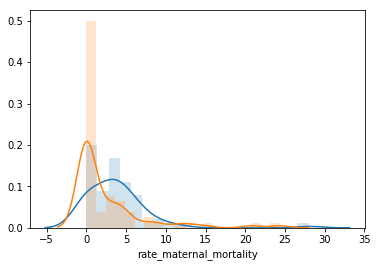

In [18]:
sns.distplot(data2011['rate_maternal_mortality'], hist_kws = dict(alpha=0.2), bins=20)
print(f"2011: {data2011['rate_maternal_mortality'].describe()}")
sns.distplot(data2016['rate_maternal_mortality'], hist_kws = dict(alpha=0.2), bins=20)
print(f"2016: {data2016['rate_maternal_mortality'].describe()}")

2011: count    64.000000
mean     33.928594
std      10.664358
min      15.810000
25%      27.135000
50%      32.390000
75%      39.935000
max      66.670000
Name: rate_infant_mortality, dtype: float64
2016: count     64.000000
mean      31.654219
std       17.171168
min        3.920000
25%       20.475000
50%       28.435000
75%       38.650000
max      103.450000
Name: rate_infant_mortality, dtype: float64


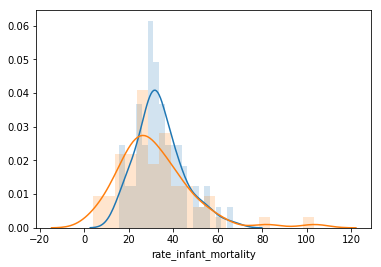

In [19]:
sns.distplot(data2011['rate_infant_mortality'], hist_kws = dict(alpha=0.2), bins=20)
print(f"2011: {data2011['rate_infant_mortality'].describe()}")
sns.distplot(data2016['rate_infant_mortality'], hist_kws = dict(alpha=0.2), bins=20)
print(f"2016: {data2016['rate_infant_mortality'].describe()}")

2011: count    64.000000
mean     42.829375
std      10.648461
min      19.230000
25%      36.085000
50%      42.250000
75%      49.390000
max      70.370000
Name: rate_under5y_mortality, dtype: float64
2016: count     64.000000
mean      39.446563
std       19.795473
min        7.870000
25%       27.380000
50%       35.295000
75%       52.112500
max      126.440000
Name: rate_under5y_mortality, dtype: float64


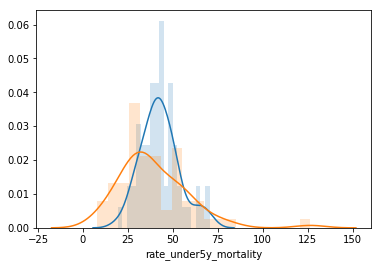

In [20]:
sns.distplot(data2011['rate_under5y_mortality'], hist_kws = dict(alpha=0.2), bins=20)
print(f"2011: {data2011['rate_under5y_mortality'].describe()}")
sns.distplot(data2016['rate_under5y_mortality'], hist_kws = dict(alpha=0.2), bins=20)
print(f"2016: {data2016['rate_under5y_mortality'].describe()}")

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler2011 = StandardScaler()
scaler2011.fit(data2011)
data2011t = pd.DataFrame(scaler2011.transform(data2011), columns=data2011.columns)
display(data2011t.head())

scaler2016 = StandardScaler()
scaler2016.fit(data2016)
data2016t = pd.DataFrame(scaler2011.transform(data2016), columns=data2016.columns)
display(data2016t.head())


,rate_maternal_mortality,rate_infant_mortality,rate_under5y_mortality
0,5.855061,-1.223792,-1.406480
1,0.231956,1.673933,1.278817
2,-0.048233,-1.202999,-0.374765
3,-0.263206,1.531220,0.940907
4,1.497638,2.426245,2.214932


,rate_maternal_mortality,rate_infant_mortality,rate_under5y_mortality
0,-0.900877,-1.529064,-2.373830
1,-0.900877,-0.506449,-1.349688
2,1.016969,-0.956324,-1.048692
3,-0.241467,-1.398638,-1.468004
4,-0.900877,-1.332480,-1.104538


# K-means cluster

## Fine-tune parameters for K-means clustering

In [23]:
def finetune_kmeans(data, max_num_cluster=10):
    output = {'Number of clusters':[],
                "Inertia":[]}
    for i in range(2,max_num_cluster):
        km = KMeans(n_clusters=i,random_state=84)
        km.fit_predict(data)
        output['Number of clusters'].append(i)
        output['Inertia'].append(km.inertia_)
    print(output['Inertia']/output['Inertia'][0])
    sns.lineplot(x=output['Number of clusters'], y=output['Inertia'],color='red')
    plt.show()
    sns.barplot(x=output['Number of clusters'],y=output['Inertia']/output['Inertia'][0],color='blue')
    plt.show()
    return pd.DataFrame.from_dict(output)
        
        

## Fine-tune 2011

In [24]:
data2011t.head()

,rate_maternal_mortality,rate_infant_mortality,rate_under5y_mortality
0,5.855061,-1.223792,-1.406480
1,0.231956,1.673933,1.278817
2,-0.048233,-1.202999,-0.374765
3,-0.263206,1.531220,0.940907
4,1.497638,2.426245,2.214932


[1.         0.76816224 0.46944336 0.34583475 0.27835838 0.24732693
 0.21762878 0.19606598 0.17216203 0.15848621 0.1400446  0.12641437
 0.11897534]


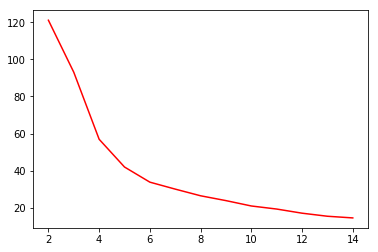

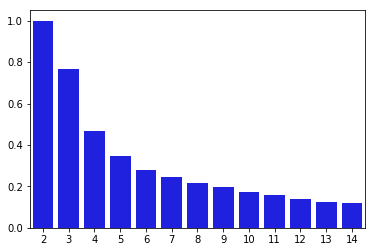

,Number of clusters,Inertia
0,2,121.163186
1,3,93.072984
2,4,56.879253
3,5,41.902440
4,6,33.726788
5,7,29.966919
6,8,26.368596
7,9,23.755979
8,10,20.859700
9,11,19.202694


In [25]:
finetune_kmeans(data=data2011t, max_num_cluster=15)

## Fine-tune 2016

[1.         0.70430018 0.48182361 0.35388405 0.26568541 0.22631112
 0.18625274 0.15261442 0.13478359 0.11963243 0.09513546 0.08168101
 0.07306106]


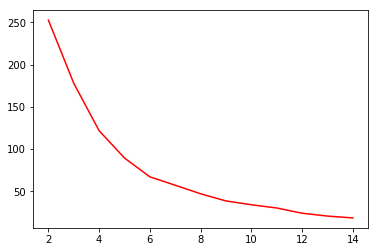

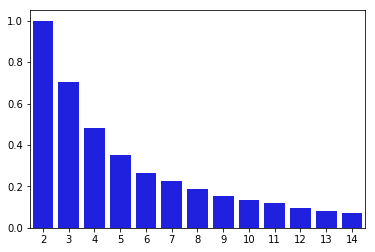

,Number of clusters,Inertia
0,2,252.495160
1,3,177.832386
2,4,121.658129
3,5,89.354011
4,6,67.084280
5,7,57.142464
6,8,47.027916
7,9,38.534403
8,10,34.032205
9,11,30.206609


In [26]:
finetune_kmeans(data=data2016t, max_num_cluster=15)

## Fine-tune 2011 and 2019

[1.         0.73163979 0.53019024 0.40407531 0.33635239 0.26915776
 0.24030904 0.21628423 0.19325425 0.17429533 0.15867683 0.14049597
 0.12908201]


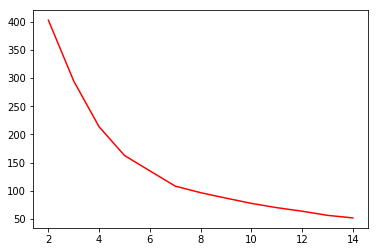

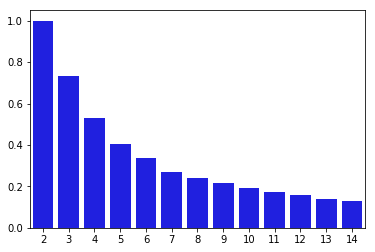

,Number of clusters,Inertia
0,2,402.603497
1,3,294.560736
2,4,213.456443
3,5,162.682134
4,6,135.416647
5,7,108.363855
6,8,96.749258
7,9,87.076789
8,10,77.804837
9,11,70.171910


In [27]:
finetune_kmeans(data=pd.concat([data2011t, data2016t], axis=0), max_num_cluster=15)

### Let's say that optimal number of clusters: 6

## Clustering on one-year and predicting on the next one

In [28]:
kmeans2011 = KMeans(n_clusters=6)
kmeans2011.fit(data2011t.values)
data2011['clusters'] = kmeans2011.labels_
data2016['clusters'] = kmeans2011.predict(data2016t.values)
print(Counter(data2011['clusters']))
print(Counter(data2016['clusters']))


Counter({1: 18, 0: 14, 4: 13, 3: 12, 2: 6, 5: 1})
Counter({0: 28, 1: 10, 2: 9, 3: 9, 4: 6, 5: 2})


## Cluster independently on both datasets

In [221]:
kmeans2011 = KMeans(n_clusters=6)
kmeans2011.fit_predict(data2011t.values)
data2011['clusters'] = kmeans2011.labels_
kmeans2016 = KMeans(n_clusters=6)
kmeans2016.fit_predict(data2016t.values)
data2016['clusters'] = kmeans2016.labels_
print(Counter(data2011['clusters']))
print(Counter(data2016['clusters']))

Counter({1: 21, 0: 15, 5: 12, 4: 10, 2: 5, 3: 1})
Counter({5: 23, 1: 16, 0: 14, 4: 7, 3: 2, 2: 2})


## Cluster on all data at once

[1.         0.69546998 0.50533774 0.40215726 0.32803356 0.28347288
 0.2445824  0.21821446 0.19745162 0.17975929 0.17189469 0.15295069
 0.14207503]


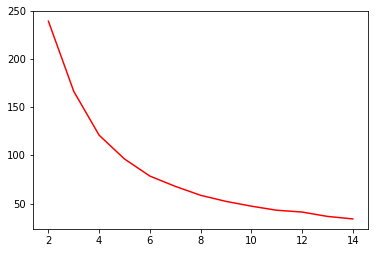

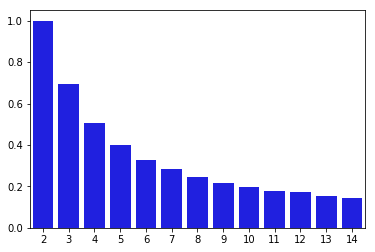

,Number of clusters,Inertia
0,2,239.531063
1,3,166.586663
2,4,121.044086
3,5,96.329156
4,6,78.574227
5,7,67.900560
6,8,58.585082
7,9,52.269141
8,10,47.295795
9,11,43.057934


In [222]:
finetune_kmeans(data=pd.concat([data2011t, data2016t], axis=0), max_num_cluster=15)

In [229]:
all_data = pd.concat([data2011t, data2016t], axis=0)
data2011['year'] = 2011
data2016['year'] = 2016
all_data_r = pd.concat([data2011, data2016], axis=0)
kmeans_all = KMeans(n_clusters=6)
kmeans_all.fit_predict(all_data)
all_data_r['clusters'] = kmeans_all.labels_
print(Counter(all_data_r['clusters']))

Counter({0: 32, 3: 30, 4: 30, 5: 26, 1: 7, 2: 3})


In [230]:
all_data_r.head()

,rate_maternal_mortality,rate_infant_mortality,rate_under5y_mortality,clusters,year
DistrictName,,,,,
Bagerhat,27.97,20.98,27.97,2,2011
Bandarban,4.69,51.64,56.34,5,2011
Barguna,3.53,21.20,38.87,3,2011
Barisal,2.64,50.13,52.77,5,2011
Bhola,9.93,59.60,66.23,1,2011


## Cluster on percent of change

In [106]:
display(data2011[['rate_maternal_mortality','rate_infant_mortality','rate_under5y_mortality', 'clusters']].groupby('clusters').mean())
display(data2011[['rate_maternal_mortality','rate_infant_mortality','rate_under5y_mortality', 'clusters']].groupby('clusters').min())
display(data2011[['rate_maternal_mortality','rate_infant_mortality','rate_under5y_mortality', 'clusters']].groupby('clusters').max())

data2016['clusters'] = kmeans2016
display(data2016[['rate_maternal_mortality','rate_infant_mortality','rate_under5y_mortality', 'clusters']].groupby('clusters').mean())
display(data2016[['rate_maternal_mortality','rate_infant_mortality','rate_under5y_mortality', 'clusters']].groupby('clusters').min())
display(data2016[['rate_maternal_mortality','rate_infant_mortality','rate_under5y_mortality', 'clusters']].groupby('clusters').max())

,rate_maternal_mortality,rate_infant_mortality,rate_under5y_mortality
clusters,,,
0,3.094474,27.985263,36.598421
1,3.725600,43.480400,52.894800
2,27.970000,20.980000,27.970000


,rate_maternal_mortality,rate_infant_mortality,rate_under5y_mortality
clusters,,,
0,0.00,15.81,19.23
1,0.00,28.34,41.28
2,27.97,20.98,27.97


,rate_maternal_mortality,rate_infant_mortality,rate_under5y_mortality
clusters,,,
0,11.86,37.50,44.44
1,9.93,66.67,70.37
2,27.97,20.98,27.97
